#Smart Sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88575 entries, 0 to 88574
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      88575 non-null  object 
 1   StockCode    88575 non-null  object 
 2   Description  87825 non-null  object 
 3   Quantity     88575 non-null  int64  
 4   InvoiceDate  88575 non-null  object 
 5   Price        88575 non-null  float64
 6   Customer ID  63380 non-null  float64
 7   Country      88575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.4+ MB


##Cleaning

In [5]:
import pandas as pd



n = 66000  # Number of rows to delete from the bottom
df = df.iloc[:-n]  # Remove last n rows

df.to_csv("cleaned_dataset.csv", index=False)  # Save the new file if needed


In [6]:
df_clean = df.drop(['Invoice', 'StockCode', 'Description', 'InvoiceDate'], axis=1)


In [7]:
# Option A: Drop Customer ID
df_clean = df_clean.drop('Customer ID', axis=1)

# Option B (alternate): Fill null Customer ID with -1
# df_clean['Customer ID'] = df_clean['Customer ID'].fillna(-1)


In [8]:
df_clean = pd.get_dummies(df_clean, columns=['Country'], drop_first=True)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Quantity', 'Price']
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])
print(df_clean.head())

   Quantity     Price  Country_Austria  Country_Belgium  \
0  0.045770  0.135122            False            False   
1  0.045770  0.125356            False            False   
2  0.045770  0.125356            False            False   
3  0.553914 -0.101684            False            False   
4  0.215151 -0.143186            False            False   

   Country_Channel Islands  Country_Cyprus  Country_Denmark  Country_EIRE  \
0                    False           False            False         False   
1                    False           False            False         False   
2                    False           False            False         False   
3                    False           False            False         False   
4                    False           False            False         False   

   Country_France  Country_Germany  ...  Country_Japan  Country_Netherlands  \
0           False            False  ...          False                False   
1           False       

In [21]:
df = df_clean

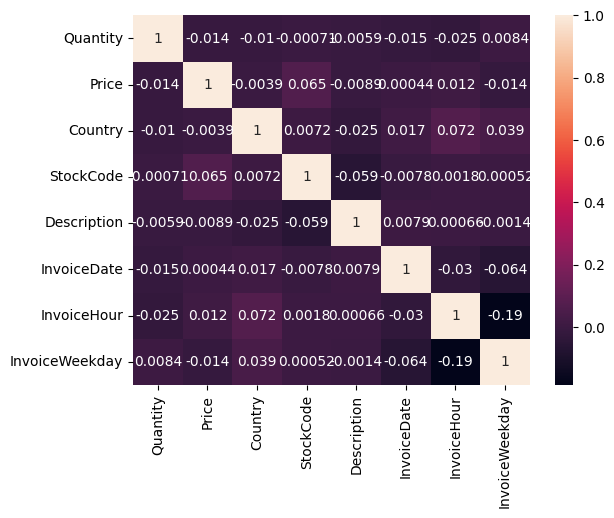

In [22]:
sns.heatmap(df.corr(), annot=True)
plt.show()

##Visualization

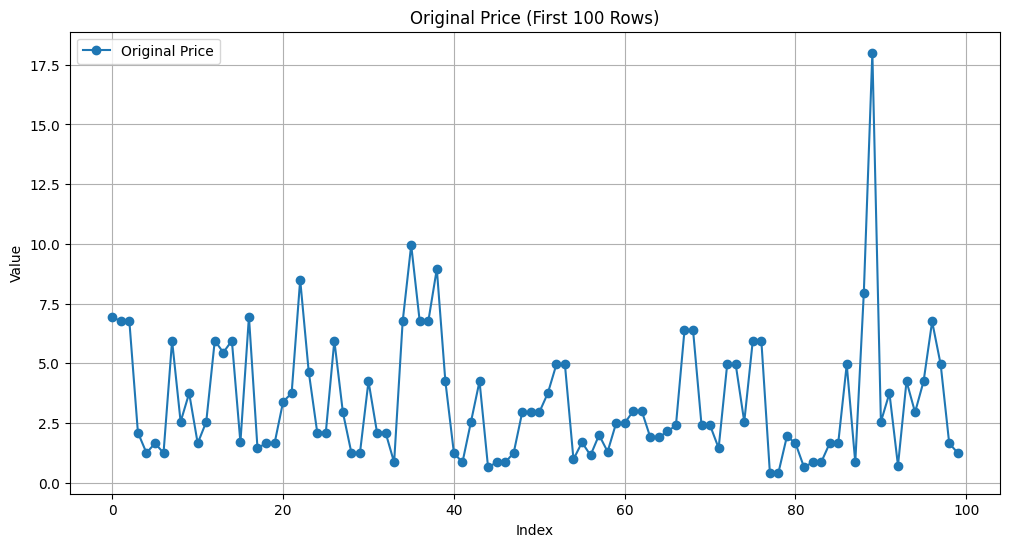

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot distribution of Quantity and Price
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(df['Quantity'], kde=True)
# plt.title('Quantity Distribution (Before Scaling)')

# plt.subplot(1, 2, 2)
# sns.histplot(df['Price'], kde=True)
# plt.title('Price Distribution (Before Scaling)')

# plt.tight_layout()
# plt.show()

# # Boxplot
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# sns.boxplot(x=df['Quantity'])
# plt.title('Quantity Boxplot (Before Scaling)')

# plt.subplot(1, 2, 2)
# sns.boxplot(x=df['Price'])
# plt.title('Price Boxplot (Before Scaling)')

# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df['Price'].values[:100], label='Original Price', marker='o')
# plt.plot(df_scaled['Price'].values[:100], label='Scaled Price', marker='x')
plt.title('Original Price (First 100 Rows)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


##Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Quantity', 'Price']])

# Put back in a DataFrame for comparison
df_scaled = df.copy()
df_scaled[['Quantity', 'Price']] = scaled


## Visualization

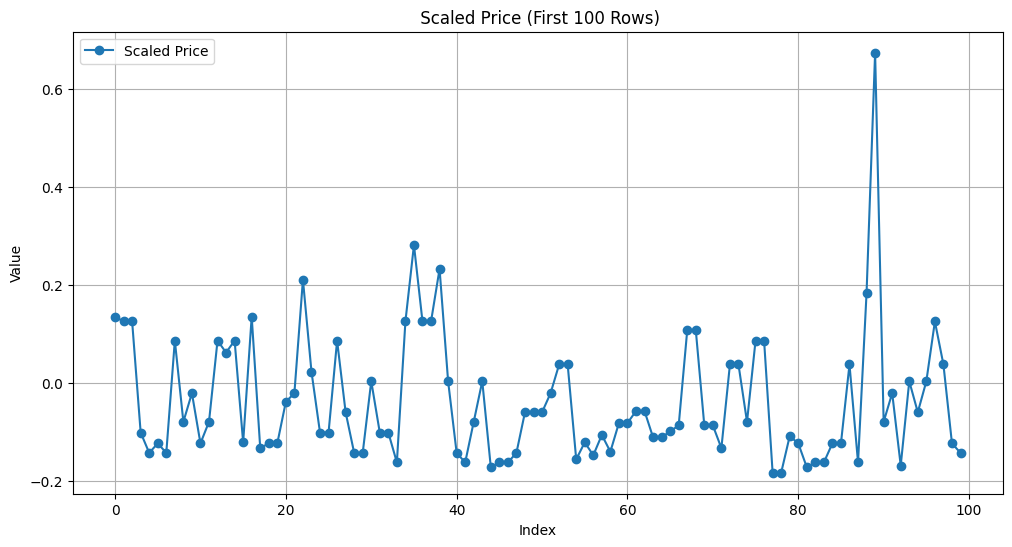

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# plt.plot(df['Price'].values[:100], label='Original Price', marker='o')
plt.plot(df_scaled['Price'].values[:100], label='Scaled Price', marker='o')
plt.title(' Scaled Price (First 100 Rows)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


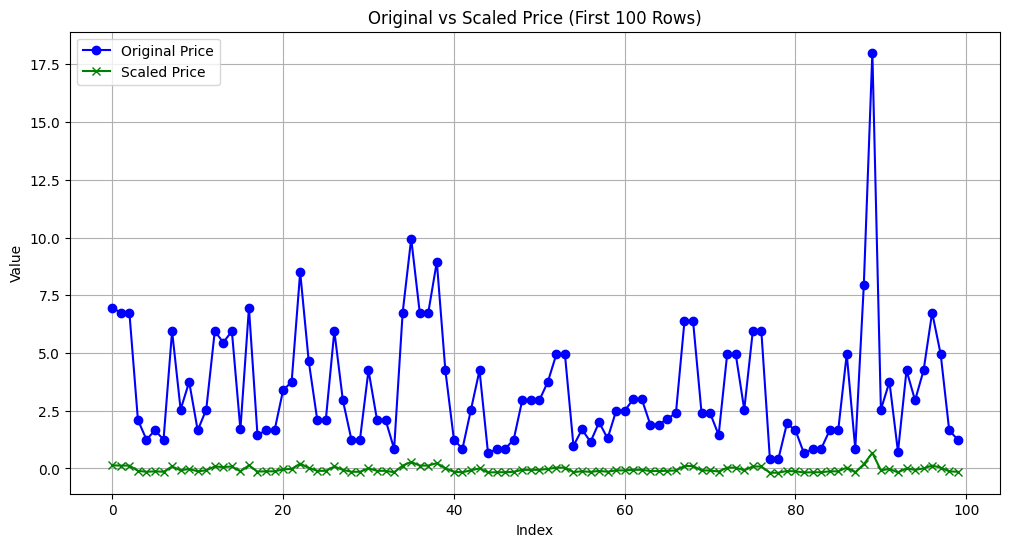

In [13]:
import matplotlib.pyplot as plt

# Only take a small slice to visualize clearly
n = 100

plt.figure(figsize=(12, 6))
plt.plot(df['Price'].values[:n], label='Original Price', color='blue', marker='o')
plt.plot(df_scaled['Price'].values[:n], label='Scaled Price', color='green', marker='x')
plt.title('Original vs Scaled Price (First 100 Rows)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


##ML Algos

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Copy and clean
df_clean = df[['Quantity', 'Price', 'Country', 'StockCode', 'Description', 'InvoiceDate']].dropna()

# Convert InvoiceDate to datetime and extract featuresdf_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], dayfirst=True, errors='coerce')
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], dayfirst=True, errors='coerce')
df_clean = df_clean.dropna(subset=['InvoiceDate'])

df_clean['InvoiceHour'] = df_clean['InvoiceDate'].dt.hour
df_clean['InvoiceWeekday'] = df_clean['InvoiceDate'].dt.weekday

# Encode categorical columns
le = LabelEncoder()
df_clean['Country'] = le.fit_transform(df_clean['Country'])
df_clean['StockCode'] = le.fit_transform(df_clean['StockCode'])
df_clean['Description'] = le.fit_transform(df_clean['Description'])

# Final feature set
X = df_clean.drop(['Price', 'InvoiceDate'], axis=1)
y = df_clean['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Linear Regression
Mean Absolute Error: 3.2247006709116572
Mean Squared Error: 347.52379433836137
Root Mean Squared Error: 18.641990085244693
R-squared: 0.005079049007840952


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree R2: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Decision Tree R2: 0.7581, MAE: 2.27, RMSE: 9.19


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest R2: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Random Forest R2: 0.7199, MAE: 1.79, RMSE: 9.89


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=3)  # smaller k is faster
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor:\nR2: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


KNN Regressor:
R2: 0.2063, MAE: 2.61, RMSE: 16.65


In [19]:
print("X_train_scaled:", X_train_scaled.shape)
print("y_train:", y_train.shape)


X_train_scaled: (18022, 6)
y_train: (18022,)


In [20]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.2)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

# Evaluation
print("🔹 SVR with RBF Results:")
print("R² Score:", r2_score(y_test, y_pred_rbf))
print("MAE:", mean_absolute_error(y_test, y_pred_rbf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rbf)))


🔹 SVR with RBF Results:
R² Score: 0.002411606397218935
MAE: 2.6335451216494277
RMSE: 18.666963503166034
